In [108]:
import numpy as np
import astropy.io.ascii as at
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import interp1d

In [2]:
## Use these lines to send the output files to an appropriate place on your
## Google Drive. Modify the last line in this cell to match the exact directory
## structure in your Drive.
import os
from google.colab import drive 
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Teaching/_PHYS104/Lab Crater Counting')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Model source

https://ui.adsabs.harvard.edu/abs/2006M%26PS...41..607B/abstract



In [6]:
bland = at.read("bland_artemieva_2006_surface_impacts.dat")
print(bland.dtype)

[('Mass(kg)', '<f8'), ('D_crater(km)', '<f8'), ('freq(N<m/yr)', '<f8'), ('interval(1/N)', '<f8')]


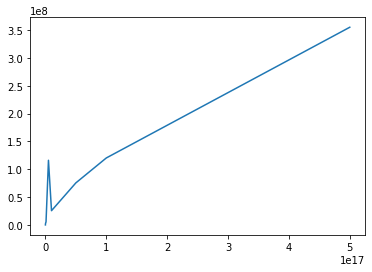

In [7]:
plt.plot(bland["Mass(kg)"],bland["interval(1/N)"])

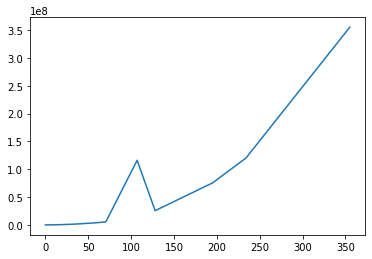

In [8]:
plt.plot(bland["D_crater(km)"],bland["interval(1/N)"])

In [90]:
bland2 = at.read("bland_artemieva_2006_atmo_impacts.dat")
print(bland2.dtype)

[('Mass(kg)', '<f8'), ('Energy(kt)', '<f8'), ('freq(N<m/yr)', '<f8'), ('interval(1/N)', '<f8')]


In [132]:
# Extrapolate to smaller impacts for the purposes of the lab
mass_to_interval = interp1d(bland2["Mass(kg)"][13:21],bland2["interval(1/N)"][13:21],
                            bounds_error=False,fill_value="extrapolate")
est_interval = mass_to_interval(bland2["Mass(kg)"][:15])
print(bland2["Mass(kg)"][13:19])
print(bland2["interval(1/N)"][13:19])
print(est_interval)

  Mass(kg) 
-----------
   500000.0
  1000000.0
  5000000.0
 10000000.0
 50000000.0
100000000.0
interval(1/N)
-------------
          3.5
          6.6
         29.0
         56.0
        246.0
        468.0
[0.40000062 0.4000031  0.4000062  0.400031   0.400062   0.40031
 0.40062    0.4031     0.4062     0.431      0.462      0.71
 1.02       3.5        6.6       ]


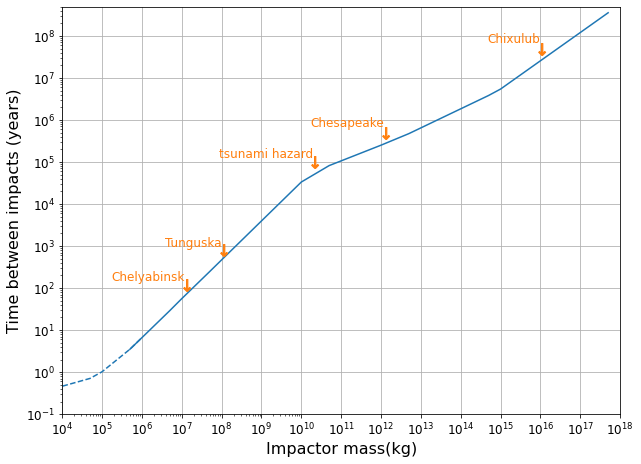

In [133]:
plt.figure(figsize=(10,7.5))
ax = plt.subplot(111)
# I'm only going to use the atmospheric estimates because they match at the 
# massive end, and the smaller objects don't hit the ground anyway
ax.plot(bland2["Mass(kg)"],bland2["interval(1/N)"],color="C0",linestyle="-")
ax.plot(bland2["Mass(kg)"][:15],est_interval,color="C0",linestyle="--")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Impactor mass(kg)",fontsize=16)
ax.set_ylabel("Time between impacts (years)",fontsize=16)
# ax.text(3e7,5e1,"Lines represent two different\nestimates for impact rates",color="C0",fontsize=12)

arrow = u'$\u2193$'
ax.plot(1e8,800,marker=arrow,color="C1",ms=12)
ax.text(1e8,1000,"Tunguska",color="C1",horizontalalignment="right",fontsize=12)

ax.plot(2e10,1e5,marker=arrow,color="C1",ms=12)
ax.text(2e10,1.3e5,"tsunami hazard",color="C1",horizontalalignment="right",fontsize=12)

ax.plot(1e16,5e7,marker=arrow,color="C1",ms=12)
ax.text(1e16,7e7,"Chixulub",color="C1",horizontalalignment="right",fontsize=12)

ax.plot(1.2e7,120,marker=arrow,color="C1",ms=12)
ax.text(1.2e7,150,"Chelyabinsk",color="C1",horizontalalignment="right",fontsize=12)

# https://www.lpi.usra.edu/exploration/education/hsResearch/presentations/2016-2017/posters/Broadwater.pdf
# We have it at Laf https://libcat.lafayette.edu/record=b1757190
ax.plot(1.2e12,5e5,marker=arrow,color="C1",ms=12)
ax.text(1.2e12,7e5,"Chesapeake",color="C1",horizontalalignment="right",fontsize=12)

ax.tick_params(labelsize=12)
ax.grid()
ax.set_xlim(1e4,1e18)

# https://stackoverflow.com/questions/44078409/matplotlib-semi-log-plot-minor-tick-marks-are-gone-when-range-is-large
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=15) 
ax.xaxis.set_major_locator(locmaj)
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=15)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_ylim(1e-1,5e8)
locmaj2 = matplotlib.ticker.LogLocator(base=10,numticks=14) 
ax.yaxis.set_major_locator(locmaj2)
locmi2 = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=14)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.savefig("bland_impact_rate.png",bbox_inches="tight")

